# Implementation of KMeans Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Randomly creating clusters using make_blobs function from sklearn and visualising

In [4]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

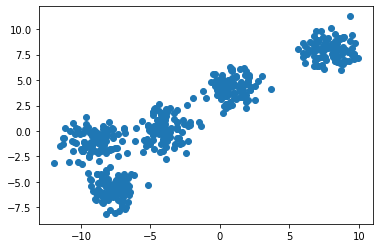

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
k = 5 
colors = ['red','orange','yellow','blue', 'green']
clusters = {}

## Function to initialise centre of clusters

In [7]:
def initialise():
    olds = []
    new = []
    for i in range(k):
        centroid = np.random.uniform(low = -10, high = 10, size = 2)
        old  = np.random.uniform(low = -12, high = -11, size = 2)
        
        new.append(centroid)
        olds.append(old)
        cluster = {"centre" : centroid,
               "points" : [],
               "color" : colors[i]
              }
        clusters[i] = cluster
    olds = np.array(olds)
    new = np.array(new)
    return (olds,new)
    #print("initialised")

### Cluster centres are randomly initialised using uniform distribution and appended to the clusters dictionary including color

## Function to Assign corresponding cluster to data points

In [8]:
def distance(a,b):
    return np.sum((a-b)**2)**0.5

### Distance function defined to calculate eucledian distance of each data point from each of the centres. Minimum distance is calculated and point is assigned to that cluster

In [9]:

def assignCluster():
    
    for i in range(X.shape[0]):
        dists = []
        for cx in range(k):
            dist = distance(X[i],clusters[cx]['centre'])
            dists.append(dist)
        nearest_cluster =np.argmin(dists)
        clusters[nearest_cluster]['points'].append(X[i])
    #print("assigned")
    

## Plotting to visualise clusters

In [10]:
#plotting to visualise
def plotClusters():
    for c in range(k):
        pts = np.array(clusters[c]['points'])
        cluster_color = clusters[c]['color']
        #print(c)
        #print(len(pts))
        try:
            plt.scatter(pts[:,0],pts[:,1],c= cluster_color)
        except:
            pass
        cluster_centre = np.array(clusters[c]['centre'])
        plt.scatter(cluster_centre[0], cluster_centre[1],c='black', s= 300, marker ='*')
    #print("plotted")


## Updating cluster centre by taking mean of all points in the cluster

In [11]:
def updateCluster():
    new_means = []
    for c in range(k):
        pts = clusters[c]['points']
        pts = np.array(pts)
        if(len(pts)>0):
            new_mean = np.mean(pts, axis = 0)
            new_means.append(new_mean)
            clusters[c]['centre'] = new_mean
            clusters[c]['points'] = []
    #print("updated")
    new_means = np.array(new_means)
    return(new_means)

    

## Performing updating and asssigning steps until the centroid values dont change

In [12]:
def convergance_centroid(max_iter = 20):
    prev, curr = initialise()
    for i in range(max_iter):
        if(np.array_equal(prev,curr)):
            break
        else:
            assignCluster()
            prev = curr
            curr = updateCluster()
    assignCluster()
    plotClusters()
    print(i)

## Running algorithm and checking prediction vs actual output

##### Prediction by algorithm

18


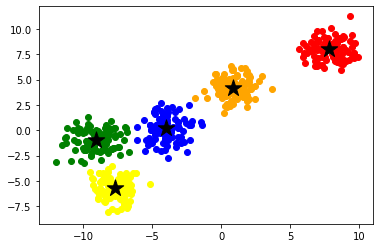

In [13]:
convergance_centroid()

##### Actual Output

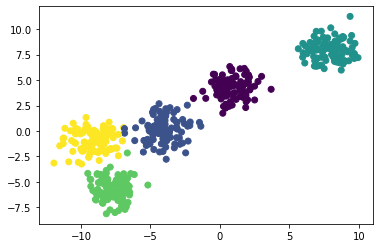

In [15]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

## Implementation using SkLearn

In [17]:
from sklearn.cluster import KMeans


In [18]:
km = KMeans(n_clusters=5)

In [19]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
print(km.labels_)

[4 1 0 4 4 0 2 4 1 4 1 0 1 4 0 4 1 4 4 1 3 3 4 0 4 3 2 2 0 2 4 2 3 3 4 3 1
 1 4 3 3 3 2 2 0 1 1 2 2 2 1 4 2 4 4 3 4 4 1 0 1 0 0 4 2 1 0 0 3 0 3 4 3 4
 3 0 4 2 3 3 0 3 0 2 1 2 0 1 2 0 2 3 4 3 3 1 4 0 0 3 1 3 0 0 1 1 1 0 0 4 1
 2 4 1 0 3 1 2 3 0 1 0 2 4 3 2 2 2 4 4 0 0 4 1 1 2 0 2 0 4 4 3 0 1 2 4 1 1
 4 0 4 4 0 0 1 3 3 2 0 4 3 1 2 3 1 3 1 3 3 3 2 4 3 1 3 2 4 0 1 2 1 4 1 3 2
 2 3 4 0 1 3 0 2 4 2 3 0 2 4 4 4 3 3 1 4 2 2 4 1 4 4 4 3 1 0 1 4 4 1 2 0 2
 2 3 4 0 4 0 2 3 0 0 4 3 4 3 0 1 0 3 3 1 4 4 0 0 3 1 3 4 2 1 2 4 2 2 2 2 1
 3 1 4 3 1 2 0 1 1 1 2 4 4 0 3 3 1 0 0 4 0 2 0 1 1 2 2 3 2 2 1 3 4 0 3 0 2
 0 0 1 4 3 1 3 3 4 2 3 0 3 2 4 4 0 1 3 2 1 3 0 2 1 2 4 3 2 0 0 3 3 3 4 2 3
 4 1 0 0 2 1 1 0 0 2 3 3 3 4 2 1 2 4 3 1 1 0 3 3 2 3 2 0 0 0 2 3 4 3 0 2 2
 1 4 1 2 4 2 0 1 3 1 0 4 4 1 1 3 1 3 2 0 1 2 4 4 1 0 3 2 4 4 4 2 1 3 1 1 1
 2 3 0 1 0 0 2 0 4 0 4 1 3 3 4 1 2 4 3 0 1 2 0 2 2 1 2 0 2 1 2 0 2 4 3 3 2
 3 1 3 3 2 4 4 0 2 3 0 2 0 1 0 1 4 3 0 4 0 4 4 3 4 3 2 1 1 0 4 4 2 2 1 2 2
 1 2 1 1 1 2 3 2 0 1 0 0 

In [21]:
km.cluster_centers_

array([[-3.97953526,  0.19458336],
       [ 7.8649674 ,  7.97988109],
       [-9.0671623 , -0.96740759],
       [ 0.88641907,  4.19441853],
       [-7.6726196 , -5.69211059]])

## predicted clustering by kmeans

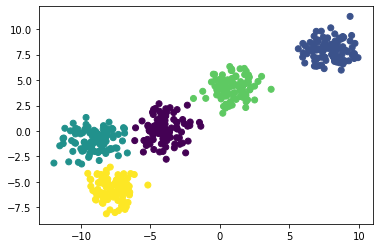

In [23]:

plt.scatter(X[:,0], X[:, 1], c= km.labels_)

## Actual values

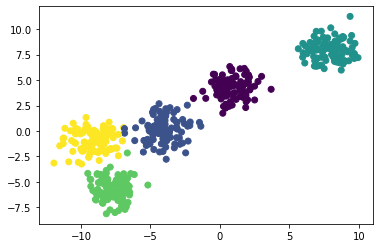

In [24]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()